<a href="https://colab.research.google.com/github/muhammed04040/Akbank-ML-Group-Project/blob/main/Akbank_ML_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
df_copy = pd.read_csv("/content/Melbourne_housing_FULL.csv")

In [ ]:
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
print(
    f"Shape: {df_copy.shape}",
    f"Size: {df_copy.size} |",
    f"Dimension: {df_copy.ndim}")

Shape: (34857, 21) Size: 731997 | Dimension: 2


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
df_copy.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

<ipython-input-8-6a93d7c1df99>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_copy.corr()


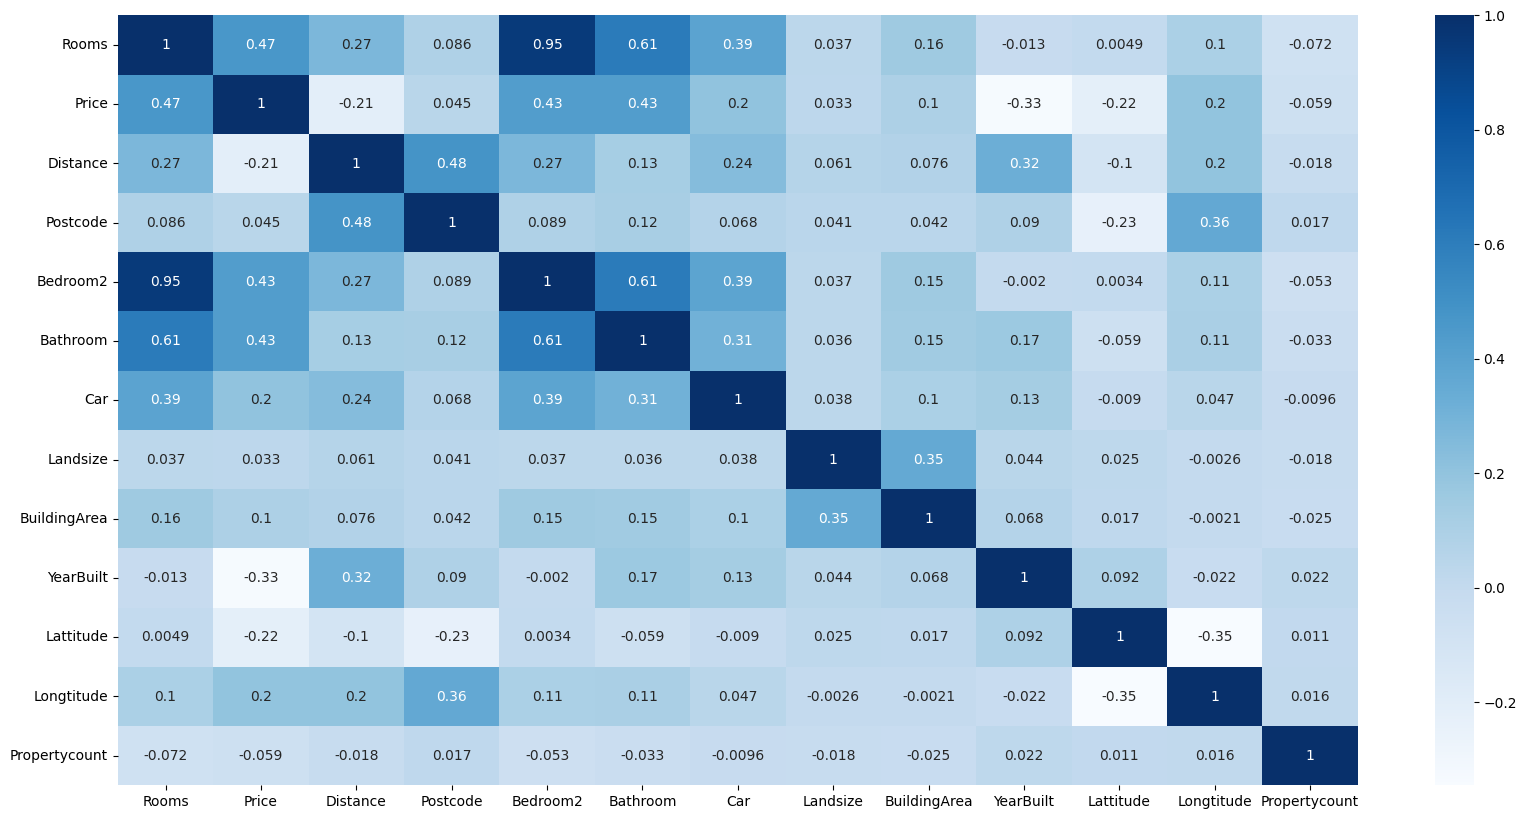

In [ ]:
corr = df_copy.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True);

In [ ]:
df_copy = df_copy.drop("Address", axis=1)
df_copy = df_copy.drop("Bedroom2", axis=1)
cat_cols = df_copy.select_dtypes(include=['object']).columns
num_cols = df_copy.select_dtypes(include=['number']).columns

In [ ]:
df_copy.duplicated().sum()

24

In [ ]:
df_copy.loc[df_copy.duplicated(keep=False), :]

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1191,Balwyn North,4,h,NaN,SP,Marshall,28/05/2016,9.2,3104.0,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,7809.0
1192,Balwyn North,4,h,NaN,SP,Marshall,28/05/2016,9.2,3104.0,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,7809.0
2584,Burwood,4,t,1000050.0,S,Philip,18/06/2016,11.7,3125.0,NaN,NaN,NaN,NaN,NaN,Monash City Council,NaN,NaN,Southern Metropolitan,5678.0
2585,Burwood,4,t,1000050.0,S,Philip,18/06/2016,11.7,3125.0,NaN,NaN,NaN,NaN,NaN,Monash City Council,NaN,NaN,Southern Metropolitan,5678.0
2743,Camberwell,4,h,NaN,S,Marshall,22/05/2016,7.8,3124.0,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,8920.0
2744,Camberwell,4,h,NaN,S,Marshall,22/05/2016,7.8,3124.0,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,8920.0
2745,Camberwell,4,h,NaN,S,Marshall,22/05/2016,7.8,3124.0,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,8920.0
6422,Malvern East,4,h,NaN,S,Jellis,17/09/2016,11.2,3145.0,NaN,NaN,NaN,NaN,NaN,Stonnington City Council,NaN,NaN,Southern Metropolitan,8801.0
6423,Malvern East,4,h,NaN,S,Jellis,17/09/2016,11.2,3145.0,NaN,NaN,NaN,NaN,NaN,Stonnington City Council,NaN,NaN,Southern Metropolitan,8801.0
6604,Maribyrnong,2,u,NaN,W,hockingstuart,22/05/2016,8.7,3032.0,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,4918.0


In [ ]:
df_copy = df_copy.drop_duplicates()
df_copy = df_copy.reset_index(drop=True)

In [ ]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34833.0,3.031034e+00,0.969971,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27237.0,1.050246e+06,641552.339232,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34832.0,1.118497e+01,6.786942,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34832.0,3.116029e+03,108.936190,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bathroom,26630.0,1.624747e+00,0.724177,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26128.0,1.728835e+00,1.010789,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23046.0,5.936072e+02,3398.915462,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13741.0,1.602516e+02,401.281270,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15550.0,1.965288e+03,37.328340,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03
Lattitude,26880.0,-3.781063e+01,0.090281,-38.19043,-37.86295,-37.8076,-3.775409e+01,-3.739020e+01


In [ ]:
df_copy['Landsize'].replace(0, np.nan, inplace=True)

In [ ]:
def zscore_replace(df, num_cols, threshold):
  for col in num_cols:
    std_dev = df[col].std()
    mean = df[col].mean()
    df["z_score"] = (df[col] - mean) / std_dev
    df[col][abs(df["z_score"]) > threshold] = mean

In [ ]:
zscore_replace(df_copy, num_cols, 3)
df_copy = df_copy.drop("z_score", axis=1)

<ipython-input-15-bf114fb0084e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][abs(df["z_score"]) > threshold] = mean


In [ ]:
df_copy.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Price             7596
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8203
Car               8705
Landsize         14224
BuildingArea     21092
YearBuilt        19283
CouncilArea          3
Lattitude         7953
Longtitude        7953
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
df_copy.isnull().sum() / len(df_copy) * 100

Suburb            0.000000
Rooms             0.000000
Type              0.000000
Price            21.806907
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002871
Postcode          0.002871
Bathroom         23.549508
Car              24.990670
Landsize         40.834841
BuildingArea     60.551776
YearBuilt        55.358424
CouncilArea       0.008613
Lattitude        22.831797
Longtitude       22.831797
Regionname        0.008613
Propertycount     0.008613
dtype: float64

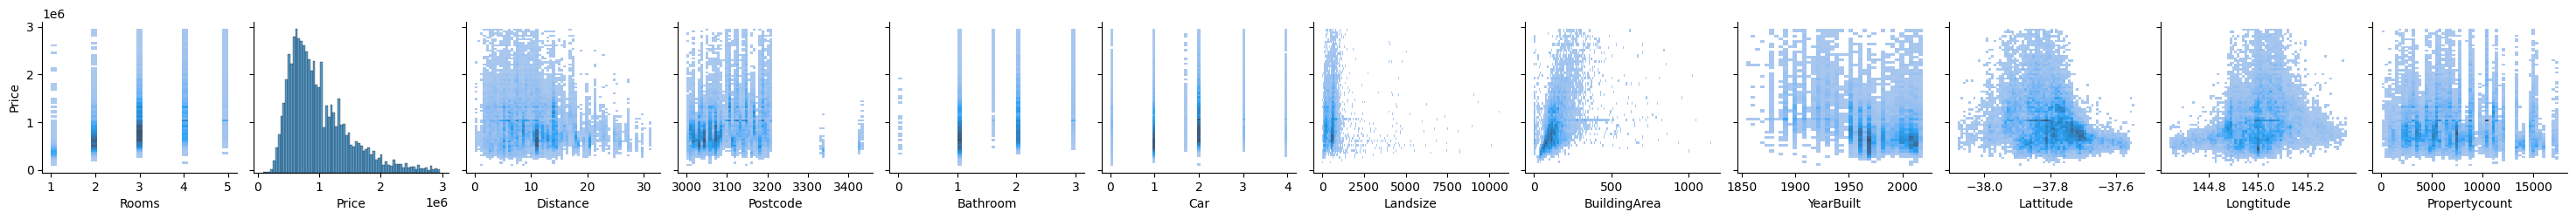

In [ ]:
sns.pairplot(df_copy, x_vars=num_cols, y_vars=['Price'], kind="hist")
plt.show()

<ipython-input-20-6a93d7c1df99>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_copy.corr()


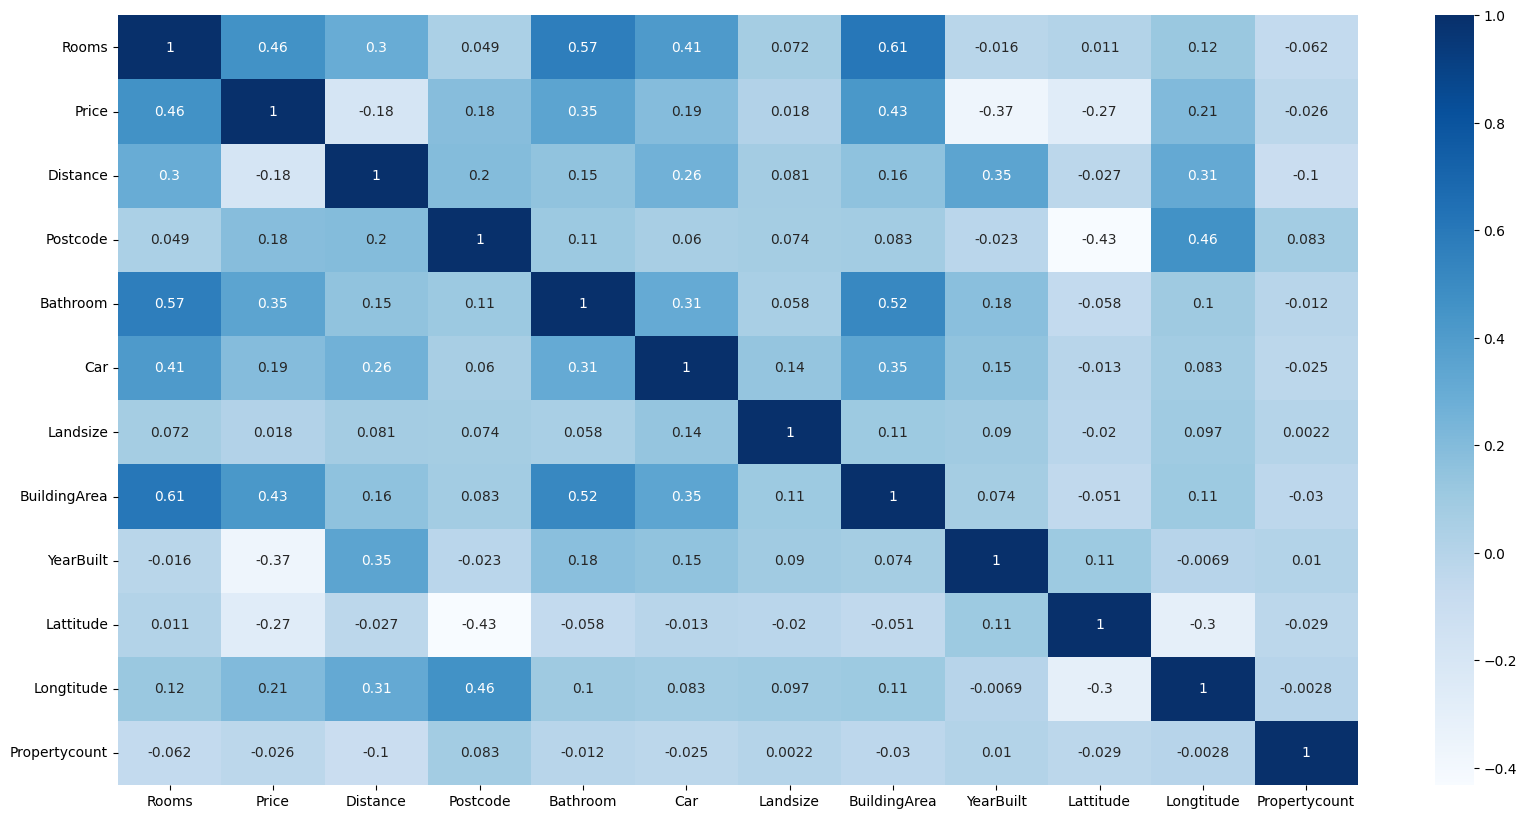

In [ ]:
corr = df_copy.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True);

In [ ]:
for col in num_cols:
  print(col, "\n", df_copy[col].value_counts(), "\n", sep="")

Rooms
3.000000    15077
2.000000     8325
4.000000     7947
5.000000     1737
1.000000     1478
3.031034      269
Name: Rooms, dtype: int64

Price
1.050246e+06    474
6.000000e+05    235
1.100000e+06    235
6.500000e+05    219
8.000000e+05    216
               ... 
6.222500e+05      1
1.789000e+06      1
3.175000e+05      1
1.600000e+05      1
1.605500e+06      1
Name: Price, Length: 2661, dtype: int64

Distance
11.200000    1418
11.184968     791
13.800000     681
9.200000      664
7.800000      660
             ... 
23.600000       2
30.600000       1
31.400000       1
22.900000       1
29.500000       1
Name: Distance, Length: 188, dtype: int64

Postcode
3073.0    844
3046.0    638
3020.0    617
3121.0    612
3165.0    583
         ... 
3099.0      2
3158.0      2
3428.0      1
3139.0      1
3159.0      1
Name: Postcode, Length: 184, dtype: int64

Bathroom
1.000000    12969
2.000000    11064
3.000000     2180
1.624747      371
0.000000       46
Name: Bathroom, dtype: int64

Car
2.0

In [ ]:
df_copy.dropna(subset=['BuildingArea', "Landsize", "YearBuilt"], how="all", inplace=True)
df_copy.dropna(subset=['Price'], inplace=True)

In [ ]:
for col in num_cols:
  df_copy[col] = df_copy[col].fillna(df_copy[col].mode().iloc[0])
for col in cat_cols:
  df_copy[col] = df_copy[col].fillna(df_copy[col].mode().iloc[0])

In [ ]:
df_copy.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

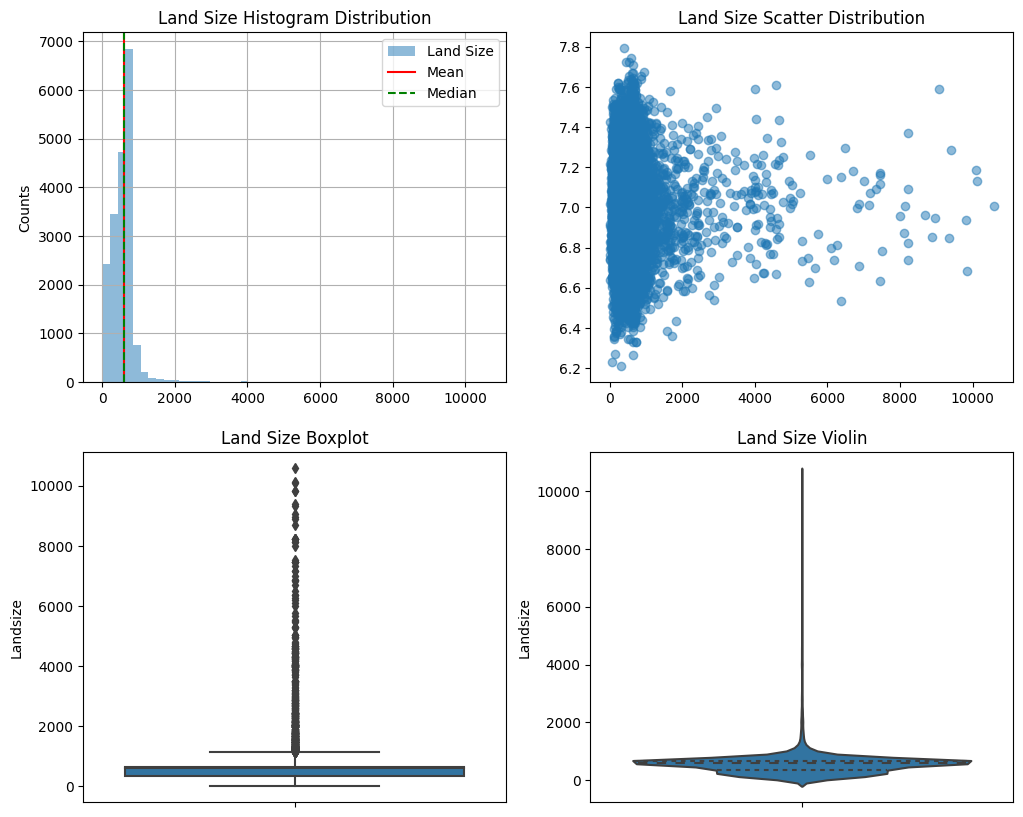

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df_copy['Landsize'].hist(bins=50, label='Land Size', alpha=0.5)
plt.axvline(np.mean(df_copy['Landsize']), ls='-', c='r', label="Mean")
plt.axvline(np.median(df_copy['Landsize']), ls='--', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Land Size Histogram Distribution");
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df_copy['Landsize'], np.random.normal(7, 0.2, size=df_copy.shape[0]), alpha=0.5)
plt.title("Land Size Scatter Distribution");

plt.subplot(2, 2, 3)
sns.boxplot(y="Landsize", data=df_copy)
plt.title("Land Size Boxplot");

plt.subplot(2, 2, 4)
sns.violinplot(y="Landsize", data=df_copy, inner="quartile", bw=0.2)
plt.title("Land Size Violin");

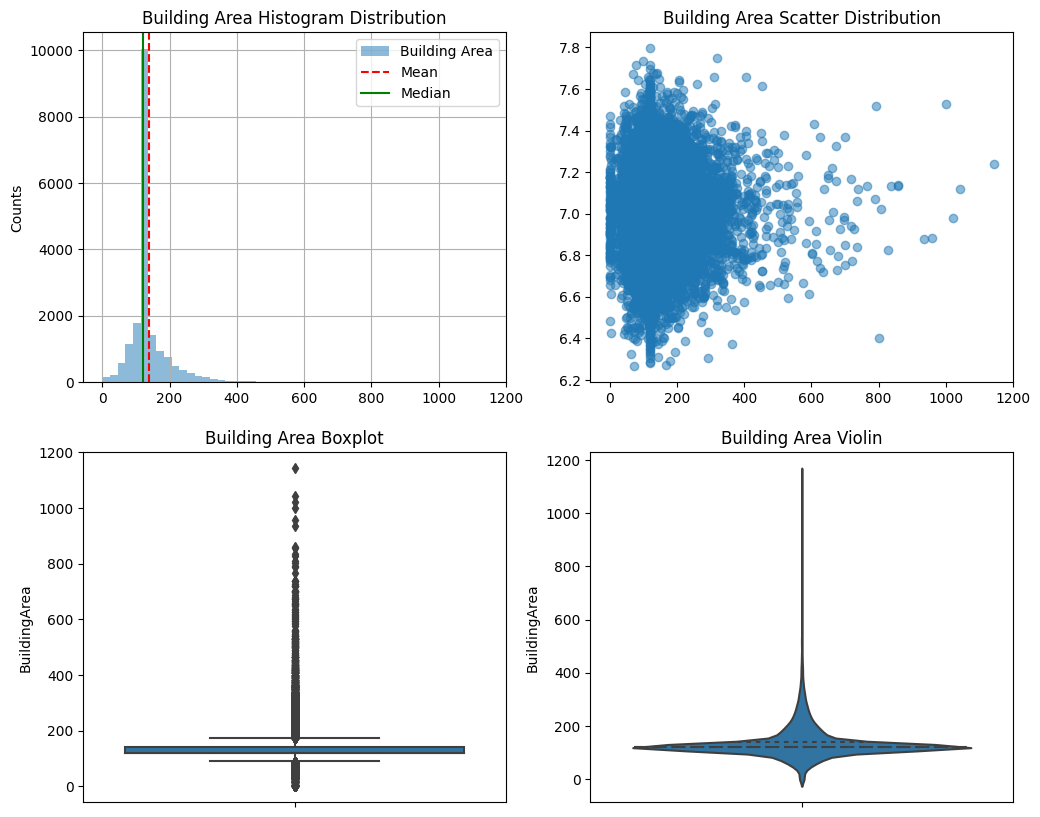

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df_copy['BuildingArea'].hist(bins=50, label='Building Area', alpha=0.5)
plt.axvline(np.mean(df_copy['BuildingArea']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df_copy['BuildingArea']), ls='-', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Building Area Histogram Distribution");
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df_copy['BuildingArea'], np.random.normal(7, 0.2, size=df_copy.shape[0]), alpha=0.5)
plt.title("Building Area Scatter Distribution");

plt.subplot(2, 2, 3)
sns.boxplot(y="BuildingArea", data=df_copy)
plt.title("Building Area Boxplot");

plt.subplot(2, 2, 4)
sns.violinplot(y="BuildingArea", data=df_copy, inner="quartile", bw=0.2)
plt.title("Building Area Violin");

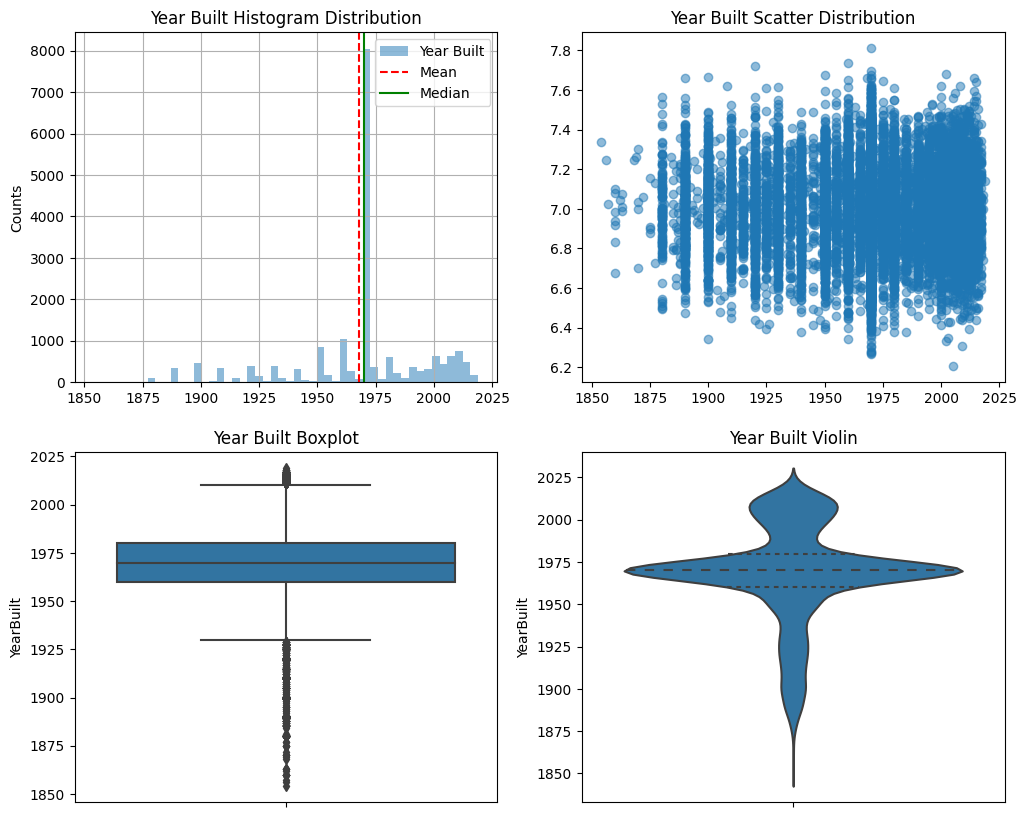

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df_copy['YearBuilt'].hist(bins=50, label='Year Built', alpha=0.5)
plt.axvline(np.mean(df_copy['YearBuilt']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df_copy['YearBuilt']), ls='-', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Year Built Histogram Distribution");
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df_copy['YearBuilt'], np.random.normal(7, 0.2, size=df_copy.shape[0]), alpha=0.5)
plt.title("Year Built Scatter Distribution");

plt.subplot(2, 2, 3)
sns.boxplot(y="YearBuilt", data=df_copy)
plt.title("Year Built Boxplot");

plt.subplot(2, 2, 4)
sns.violinplot(y="YearBuilt", data=df_copy, inner="quartile", bw=0.2)
plt.title("Year Built Violin");

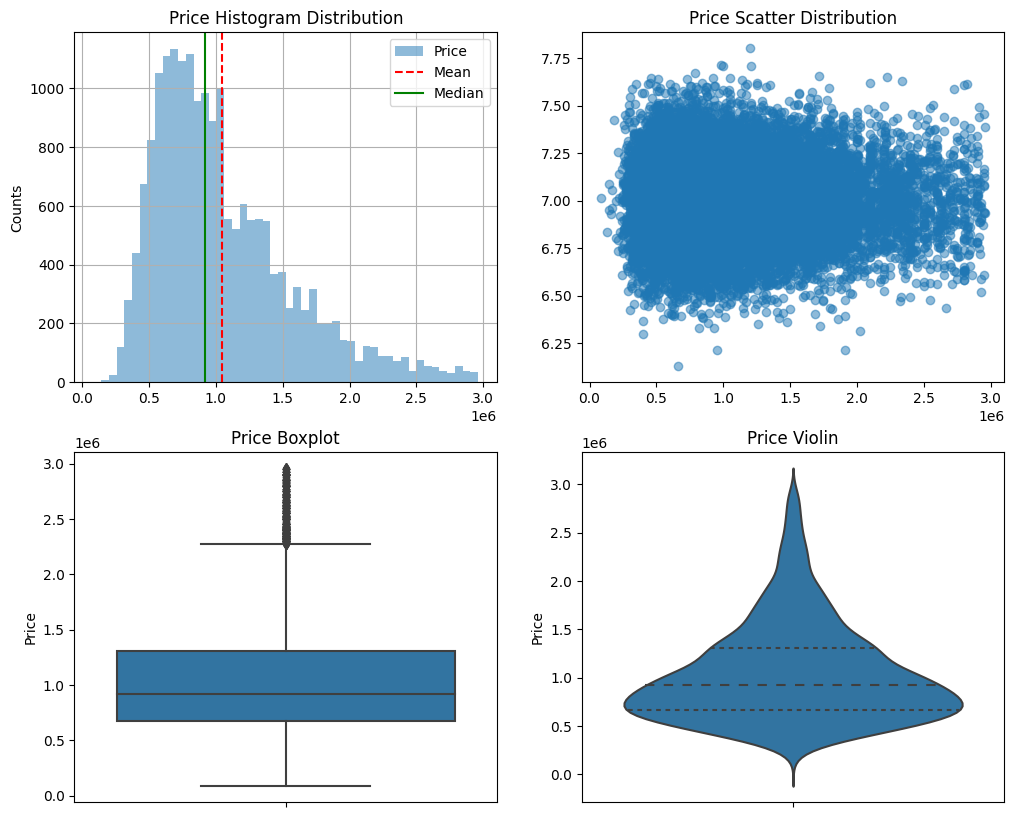

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df_copy['Price'].hist(bins=50, label='Price', alpha=0.5)
plt.axvline(np.mean(df_copy['Price']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df_copy['Price']), ls='-', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Price Histogram Distribution");
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df_copy['Price'], np.random.normal(7, 0.2, size=df_copy.shape[0]), alpha=0.5)
plt.title("Price Scatter Distribution");

plt.subplot(2, 2, 3)
sns.boxplot(y="Price", data=df_copy)
plt.title("Price Boxplot");

plt.subplot(2, 2, 4)
sns.violinplot(y="Price", data=df_copy, inner="quartile", bw=0.2)
plt.title("Price Violin");

In [ ]:
df_copy = pd.get_dummies(df_copy, columns=cat_cols, drop_first=True)
df_copy.head()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2.0,1480000.0,2.5,3067.0,1.0,1.0,202.0,120.0,1970.0,-37.7996,...,0,1,0,0,1,0,0,0,0,0
2,2.0,1035000.0,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,...,0,1,0,0,1,0,0,0,0,0
4,3.0,1465000.0,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,...,0,1,0,0,1,0,0,0,0,0
5,3.0,850000.0,2.5,3067.0,2.0,1.0,94.0,120.0,1970.0,-37.7969,...,0,1,0,0,1,0,0,0,0,0
6,4.0,1600000.0,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
X = df_copy.drop("Price", axis=1)
y = df_copy.loc[:,"Price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [ ]:
lasso = Lasso()
linear = LinearRegression()
ridge = Ridge()
elsatic = ElasticNet()
kn = KNeighborsRegressor()
rndm_forest = RandomForestRegressor()
gradient = GradientBoostingRegressor()
ada = AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
xgb = XGBRegressor()
lgbm = LGBMRegressor()
cb = CatBoostRegressor()

In [ ]:
lasso.fit(X_train, y_train)
linear.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elsatic.fit(X_train, y_train)
kn.fit(X_train, y_train)
rndm_forest.fit(X_train, y_train)
gradient.fit(X_train, y_train)
ada.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgbm.fit(X_train, y_train)
cb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.197e+14, tolerance: 3.519e+11
  model = cd_fast.enet_coordinate_descent(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2441
[LightGBM] [Info] Number of data points in the train set: 13223, number of used features: 368
[LightGBM] [Info] Start training from score 1047838.297389
Learning rate set to 0.061567
0:	learn: 500357.0268953	total: 58.4ms	remaining: 58.3s
1:	learn: 485277.9956889	total: 65.5ms	remaining: 32.7s
2:	learn: 471141.0990745	total: 72.1ms	remaining: 24s
3:	learn: 458392.1951220	total: 78.8ms	remaining: 19.6s
4:	learn: 446273.1502762	total: 85.3ms	remaining: 17s
5:	learn: 434743.4530177	total: 92ms	remaining: 15.2s
6:	learn: 424035.0410265	total: 98.6ms	remaining: 14s
7:	learn: 414923.2225749	total: 105ms	remaining: 13s
8:	learn: 406352.6227673	total: 112ms

In [ ]:
lasso_pred = lasso.predict(X_test)
linear_pred = linear.predict(X_test)
ridge_pred = ridge.predict(X_test)
elastic_pred = elsatic.predict(X_test)
kn_pred = kn.predict(X_test)
random_forest_pred = rndm_forest.predict(X_test)
gradient_pred = gradient.predict(X_test)
ada_pred = ada.predict(X_test)
xgb_pred = xgb.predict(X_test)
lgbm_pred = lgbm.predict(X_test)
cb_pred = cb.predict(X_test)

In [ ]:
print(mean_absolute_error(y_test, lasso_pred))
print(mean_absolute_error(y_test, linear_pred))
print(mean_absolute_error(y_test, ridge_pred))
print(mean_absolute_error(y_test, elastic_pred))
print(mean_absolute_error(y_test, kn_pred))
print(mean_absolute_error(y_test, random_forest_pred))
print(mean_absolute_error(y_test, gradient_pred))
print(mean_absolute_error(y_test, ada_pred))
print(mean_absolute_error(y_test, xgb_pred))
print(mean_absolute_error(y_test, lgbm_pred))
print(mean_absolute_error(y_test, cb_pred))

202399.39385900728
202627.10172528404
201413.84292092285
269331.4169083448
236122.08508906726
159322.41936075076
186750.0129624797
257967.81637448203
166378.1375365487
162756.3975905124
160986.769554771


In [ ]:
print(mean_squared_error(y_test, lasso_pred))
print(mean_squared_error(y_test, linear_pred))
print(mean_squared_error(y_test, ridge_pred))
print(mean_squared_error(y_test, elastic_pred))
print(mean_squared_error(y_test, kn_pred))
print(mean_squared_error(y_test, random_forest_pred))
print(mean_squared_error(y_test, gradient_pred))
print(mean_squared_error(y_test, ada_pred))
print(mean_squared_error(y_test, xgb_pred))
print(mean_squared_error(y_test, lgbm_pred))
print(mean_squared_error(y_test, cb_pred))

84709778538.6719
84826058705.55182
83974443889.16794
139132792249.97906
124815570151.93529
62017294978.32162
76841884666.92416
118220234697.87173
65326647667.976135
61627723357.60925
60932114790.667274


In [ ]:
print(r2_score(y_test, lasso_pred))
print(r2_score(y_test, linear_pred))
print(r2_score(y_test, ridge_pred))
print(r2_score(y_test, elastic_pred))
print(r2_score(y_test, kn_pred))
print(r2_score(y_test, random_forest_pred))
print(r2_score(y_test, gradient_pred))
print(r2_score(y_test, ada_pred))
print(r2_score(y_test, xgb_pred))
print(r2_score(y_test, lgbm_pred))
print(r2_score(y_test, cb_pred))

0.680860915894022
0.6804228372377212
0.6836312457260962
0.4758254282592085
0.5297647163335555
0.7663535065308159
0.7105027410456046
0.5546122528575782
0.753885715862731
0.7678211945872906
0.7704418587512134


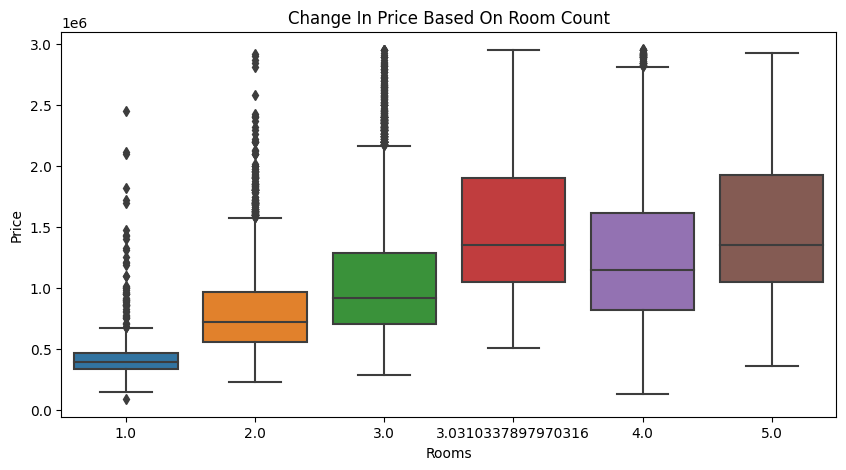

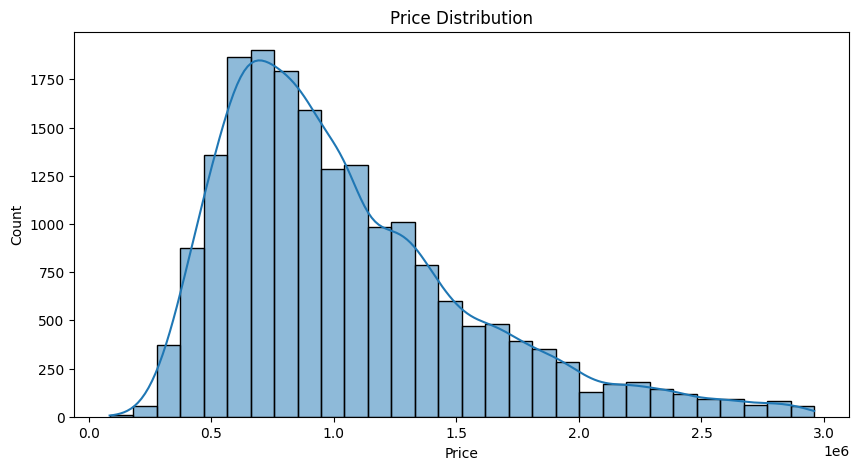

In [ ]:
# Oda sayısına göre fiyat dağılımı
plt.figure(figsize=(10, 5))
sns.boxplot(x='Rooms', y='Price', data=df_copy)
plt.title('Change In Price Based On Room Count')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df_copy['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.show()